In [120]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [136]:
## Function to perform Neuro-Clustering.
## Takes as inputs the data-points as numpy array which are assumed to of dimension nxm. 
## and a parameter k for number of clusters.
def neuro_clustering(data,k,e):
    x=data
    data_size,feature_size=x.shape[0],x.shape[1]  # data_size=n and feature_size=m
    clusters=k
    
    means=x.mean(0)
    std=x.std(0)
    weights=np.zeros((k,feature_size))
    
    for features in range(feature_size):
        weights[:,features:features+1]=np.random.normal(means[features],std[features],(k,1))
    
    epochs=e
    learning_rate=0.01
    delta_change=[]
    for i in range(epochs):
        np.random.shuffle(x)
        delta=0
        for j in range(x.shape[0]):
            euclid_dist=((weights-x[j:j+1,:])**2).sum(1)
            min_index=np.argmin(euclid_dist)
            
            change=(x[j,:]-weights[min_index,:])
            delta=delta+(sum(map(abs,change)))
            weights[min_index:min_index+1,:] = weights[min_index:min_index+1,:] + 2*learning_rate*change
     
        delta_change.append(delta)
        
    labels=np.zeros((data_size,1))
    for i in range(data.shape[0]):
        euclid_dist=((weights-data[i:i+1,:])**2).sum(1)
        min_index=np.argmin(euclid_dist)
        labels[i,0]=min_index
    
    
    return pd.DataFrame(np.hstack((data,labels))),delta_change

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


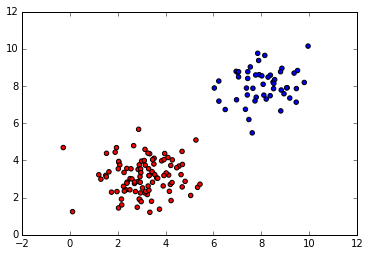

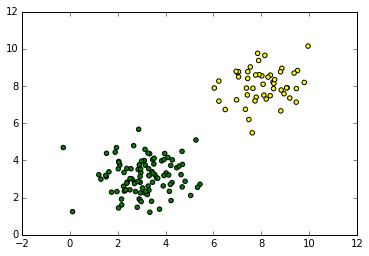

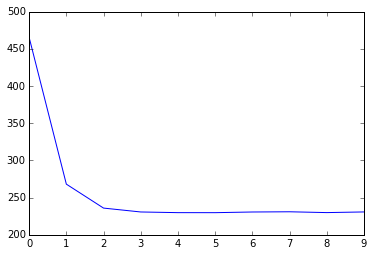

In [123]:
# Dataset 1. Simple quite spread out dataset
x1=np.random.normal(3,1,(100,1))
y1=np.random.normal(3,1,(100,1))
c=np.zeros((100,1))
data1=np.hstack((x1,y1))
data1=np.hstack((data1,c))

x2=np.random.normal(8,1,(50,1))
y2=np.random.normal(8,1,(50,1))
c=np.ones((50,1))
data2=np.hstack((x2,y2))
data2=np.hstack((data2,c))

final_data=np.vstack((data1,data2))
final_data=pd.DataFrame(final_data,columns=["x","y","l"])
colors={0:'red',1:'blue'}
plt.scatter(final_data.iloc[:,0],final_data.iloc[:,1],c=final_data['l'].apply(lambda x: colors[x]))
plt.savefig('Original_simple.png')
plt.show()
clustered_data,delta=neuro_clustering(np.array(final_data.iloc[:,:2]),2,10)
colors={0:'yellow',1:'green'}
plt.scatter(clustered_data.iloc[:,0],clustered_data.iloc[:,1],c=clustered_data.iloc[:,2].apply(lambda x: colors[x]))
plt.savefig('Clustered_simple.png')
plt.show()
plt.plot(delta)
plt.savefig('Delta_simple.png')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


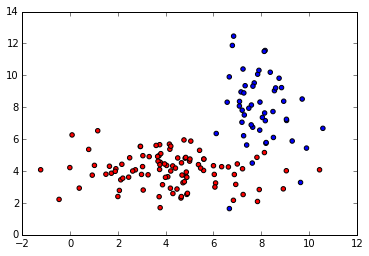

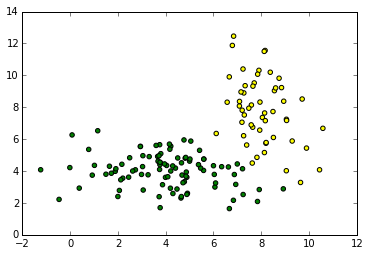

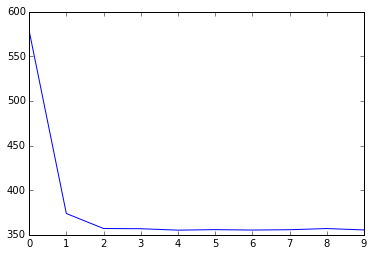

In [124]:
# Dataset 2. Bit more complex than the first one
x1=np.random.normal(4,2,(100,1))
y1=np.random.normal(4,1,(100,1))
c=np.zeros((100,1))
data1=np.hstack((x1,y1))
data1=np.hstack((data1,c))

x2=np.random.normal(8,1,(50,1))
y2=np.random.normal(8,2,(50,1))
c=np.ones((50,1))
data2=np.hstack((x2,y2))
data2=np.hstack((data2,c))

final_data=np.vstack((data1,data2))
final_data=pd.DataFrame(final_data,columns=["x","y","l"])
colors={0:'red',1:'blue'}
plt.scatter(final_data.iloc[:,0],final_data.iloc[:,1],c=final_data['l'].apply(lambda x: colors[x]))
plt.savefig('Original_complex.png')
plt.show()
clustered_data,delta=neuro_clustering(np.array(final_data.iloc[:,:2]),2,10)
colors={0:'yellow',1:'green'}
plt.scatter(clustered_data.iloc[:,0],clustered_data.iloc[:,1],c=clustered_data.iloc[:,2].apply(lambda x: colors[x]))
plt.savefig('Clustered_complex.png')
plt.show()
plt.plot(delta)
plt.savefig('Delta_complex.png')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


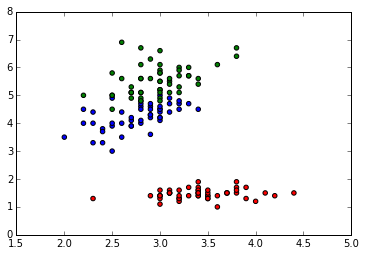

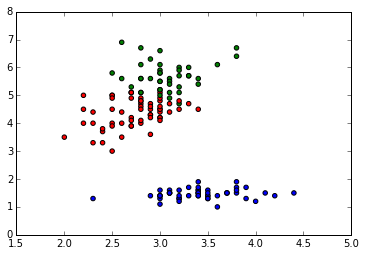

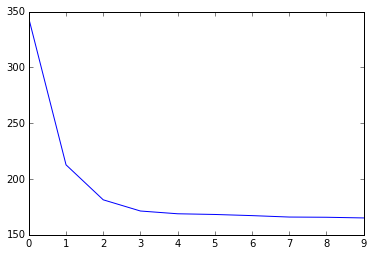

In [139]:
# Dataset 3. The iris dataset that has 4 features and 3 classes.
dataset=datasets.load_iris()
features=np.array(dataset.data[:,:4])
label=np.array(dataset.target)
label=np.resize(label,(label.shape[0],1))
final_data=np.hstack((features,label))

## Using second and third feature for plotting as it is visually more clear.
colors={0:'red',1:'blue',2:'green'}
data_pd=pd.DataFrame(final_data,columns=["a","b","c","d","l"])
plt.scatter(features[:,1],features[:,2],c=data_pd.iloc[:,4].apply(lambda x: colors[x]))
plt.savefig('Iris_original.png')
plt.show()

clustered_data,delta=neuro_clustering(np.array(data_pd.iloc[:,:4]),3,10)
plt.scatter(clustered_data.iloc[:,1],clustered_data.iloc[:,2],c=clustered_data.iloc[:,4].apply(lambda x: colors[x]))
plt.savefig('Iris_clustered.png')
plt.show()
plt.plot(delta)
plt.savefig('Iris_delta.png')
plt.show()